::: {.callout-note collapse="true"}
## Learning Outcomes
- Use `matplotlib`, `seaborn`, and `plotly` to create data visualization.
- Analyze histogram and identify outliers, mode, and skewness.
- Using `boxplot` and `violinplot` to compare two distributions.
:::

In our journey of the data science lifecycle, we have begun to explore the vast world of exploratory data analysis. More recently, we learned how to pre-process data using various data manipulation techniques. As we work towards understanding our data, there is one key component missing in our arsenal - the ability to visualize and discern relationships in existing data.

These next two lectures will introduce you to various examples of data visualizations and their underlying theory. In doing so, we'll motivate their importace in real-world examples with the use of plotting libraries.

## Visualizations in Data 8 and Data 100 (so far)

You've likely encountered several forms of data visualizations in your studies. You may remember two such examples from Data 8: line charts and histograms. Each of these served a unique purpose. For example, line charts displayed how numerical quantities changed over time, while histograms were useful in understanding a variable's distribution. 

:::: {.columns}

::: {.column width="30%"}
**Line Chart**

<img src="images/line_chart_viz.png" alt='line_chart_viz' width='300'>
:::

::: {.column width="30%"}
<!-- empty column to create gap -->
:::

::: {.column width="30%"}
**Histogram**

<img src="images/histogram_viz.png" alt='histogram_viz' width='300'>
:::

::::

## Goals of Visualization

Visualizations are useful for a number of reasons. In Data 100, we consider two areas in particular:

1. To broaden your understanding of the data
    - Key part in exploratory data analysis.
    - Useful in investigating relationships between variables.
2. To communicate results/conclusions to others 
    - Visualization theory is especially important here.

One of the most common applications of visualizations is in understanding a distribution of data.

This course note will focus on the first half of visualization topics in Data 100. The goal here is to understand how to choose the "right" plot depending on different variable types and, secondly, how to generate these plots through code.

## An Overview of Distributions

A distribution describes the frequency of unique values in a variable. Distributions must satisfy two properties:

   1. Each data point must belong to only one category.
   2. The total frequency of all categories must sum to 100%. In other words, their total count should equal the number of values in consideration.
   
:::: {.columns}

::: {.column width="30%"}
**Not a Valid Distribution**

<img src="images/bad_distro.png" alt='bad_distro' width='300'>
:::

::: {.column width="30%"}
<!-- empty column to create gap -->
:::

::: {.column width="30%"}
**Valid Distribution**

<img src="images/good_distro.png" alt='good_distro' width='300'>
:::

::::

Left Diagram: This is not a valid distribution since individuals can be associated to more than one category and the bar values demonstrate values in minutes and not probability 

Right Diagram: This example satisfies the two properties of distributions, so it is a valid distribution.

## Variable Types Should Inform Plot Choice

Different plots are more or less suited for displaying particular types of variables, laid out in the diagram below:

<img src="images/variable_types_vis_1.png" alt='variable_types_diagram' width='600'>


## Bar Plots

As we saw above, a **bar plot** is one of the most common ways of displaying the distribution of a **qualitative** (categorical) variable. The length of a bar plot encodes the frequency of a category; the width encodes no useful information. The color *could* indicate a sub-category, but this is not necessarily the case. 

Let's contextualize this in an example. We will use the World Bank dataset (`wb`) in our analysis.

In [4]:
#| code-fold: true
import pandas as pd

wb = pd.read_csv("data/world_bank.csv", index_col=0)
wb.head()

,Continent,Country,Primary completion rate: Male: % of relevant age group: 2015,Primary completion rate: Female: % of relevant age group: 2015,Lower secondary completion rate: Male: % of relevant age group: 2015,Lower secondary completion rate: Female: % of relevant age group: 2015,Youth literacy rate: Male: % of ages 15-24: 2005-14,Youth literacy rate: Female: % of ages 15-24: 2005-14,Adult literacy rate: Male: % ages 15 and older: 2005-14,Adult literacy rate: Female: % ages 15 and older: 2005-14,...,Access to improved sanitation facilities: % of population: 1990,Access to improved sanitation facilities: % of population: 2015,Child immunization rate: Measles: % of children ages 12-23 months: 2015,Child immunization rate: DTP3: % of children ages 12-23 months: 2015,Children with acute respiratory infection taken to health provider: % of children under age 5 with ARI: 2009-2016,Children with diarrhea who received oral rehydration and continuous feeding: % of children under age 5 with diarrhea: 2009-2016,Children sleeping under treated bed nets: % of children under age 5: 2009-2016,Children with fever receiving antimalarial drugs: % of children under age 5 with fever: 2009-2016,Tuberculosis: Treatment success rate: % of new cases: 2014,Tuberculosis: Cases detection rate: % of new estimated cases: 2015
0,Africa,Algeria,106.0,105.0,68.0,85.0,96.0,92.0,83.0,68.0,...,80.0,88.0,95.0,95.0,66.0,42.0,NaN,NaN,88.0,80.0
1,Africa,Angola,NaN,NaN,NaN,NaN,79.0,67.0,82.0,60.0,...,22.0,52.0,55.0,64.0,NaN,NaN,25.9,28.3,34.0,64.0
2,Africa,Benin,83.0,73.0,50.0,37.0,55.0,31.0,41.0,18.0,...,7.0,20.0,75.0,79.0,23.0,33.0,72.7,25.9,89.0,61.0
3,Africa,Botswana,98.0,101.0,86.0,87.0,96.0,99.0,87.0,89.0,...,39.0,63.0,97.0,95.0,NaN,NaN,NaN,NaN,77.0,62.0
5,Africa,Burundi,58.0,66.0,35.0,30.0,90.0,88.0,89.0,85.0,...,42.0,48.0,93.0,94.0,55.0,43.0,53.8,25.4,91.0,51.0


We can visualize the distribution of the `Maternal Smoker` column using a bar plot. There are a few ways to do this.

### Plotting in Pandas

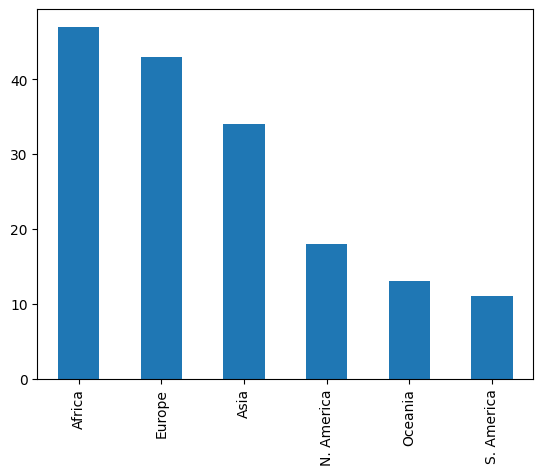

In [5]:
wb['Continent'].value_counts().plot(kind = 'bar');

Recall that `.value_counts()` returns a `Series` with the total count of each unique value. We call `.plot(kind = 'bar')` on this result to visualize these counts as a bar plot.

Plotting methods in `pandas` are the least preferred and not supported in Data 100, as their functionality is limited. Instead, future examples will focus on other libraries built specifically for visualizing data. The most well-known library here is `matplotlib`.

### Plotting in Matplotlib

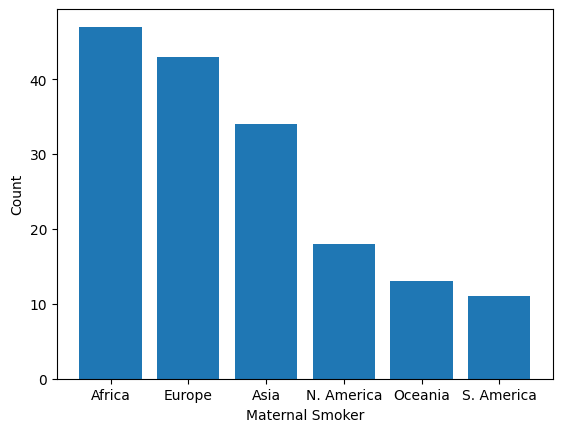

In [12]:
import matplotlib.pyplot as plt # matplotlib is typically given the alias plt

continent = wb['Continent'].value_counts()
plt.bar(continent.index, continent)
plt.xlabel('Maternal Smoker')
plt.ylabel('Count');

While more code is required to achieve the same result, `matplotlib` is often used over `pandas` for its ability to plot more complex visualizations, some of which are discussed shortly.

However, note how we needed to label the axes with `plt.xlabel` and `plt.ylabel` - `matplotlib` does not support automatic axis labeling. To get around these inconveniences, we can use a more efficient plotting library, `seaborn`.

### Plotting in Seaborn

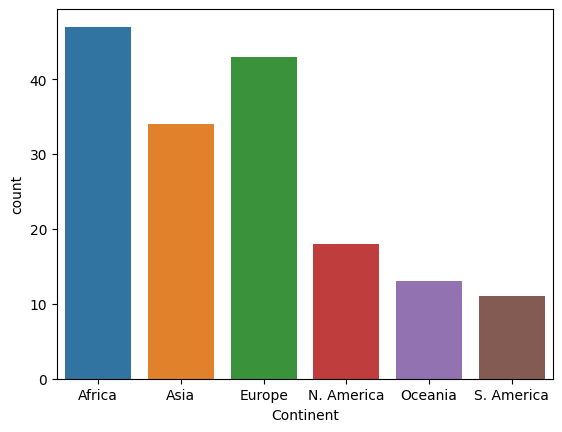

In [16]:
import seaborn as sns # seaborn is typically given the alias sns
sns.countplot(data = wb, x = 'Continent');

`seaborn.countplot` both counts and visualizes the number of unique values in a given column. This column is specified by the `x` argument to `sns.countplot`, while the `DataFrame` is specified by the `data` argument. In contrast to `matplotlib`, the general structure of a seaborn call involves passing in an entire DataFrame, and then specify what column(s) to plot.

For the vast majority of visualizations, `seaborn` is far more concise and aesthetically pleasing than `matplotlib`. However, the color scheme of this particular bar plot is abritrary - it encodes no additional information about the categories themselves. This is not always true; color may signify meaningful detail in other visualizations. We'll explore this more in-depth during the next lecture.

By now, you'll have noticed that each of these plotting libraries have a very different syntax. As with `pandas`, we'll teach you the important methods in `matplotlib` and `seaborn`, but you'll learn more through documentation.

1. [Matplotlib Documentation](https://matplotlib.org/stable/index.html)
2. [Seaborn Documentation](https://seaborn.pydata.org/)

Example Questions:

- What colors should we use?
- How wide should the bars be?
- Should the legend exist?
- Should the bars and axes have dark borders?

To accomplish goal 2, here are some ways we can improve plot:

- Introducing different colors for each bar
- Including a legend
- Including a title
- Labeling the y-axis
- Using color-blind friendly palettes
- Re-orienting the labels
- Increase the font size


## Histograms

**Histograms** are a natural extension to bar plots; they visualize the distribution of **quantitative** (numerical) data.

Revisiting our example with the `wb` DataFrame, let's plot the distribution of `Gross national income per capita`.

In [ ]:
#| code-fold: true
wb.head(5)

How should we define our categories for this variable? In the previous example, these were a few unique values of the `Continent` column. If we use similar logic here, our categories are the different numerical values contained in the `Gross national income per capita, Atlas method: $: 2016` column.

Under this assumption, let's plot this distribution using the `seaborn.countplot` function.

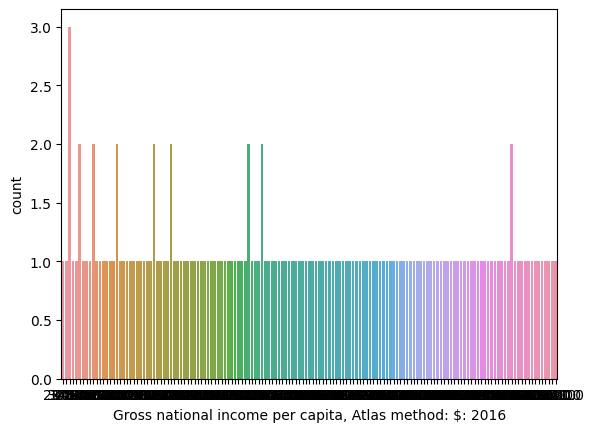

In [17]:
sns.countplot(data = wb, x = 'Gross national income per capita, Atlas method: $: 2016');

This histogram clearly suffers from **overplotting**. This is somewhat expected for `Gross national income per capita` - it is a quantitative variable that takes on a wide range of values.

To combat this problem, statisticians use bins to categorize numerical data. Luckily, `seaborn` provides a helpful plotting function that automatically bins our data.

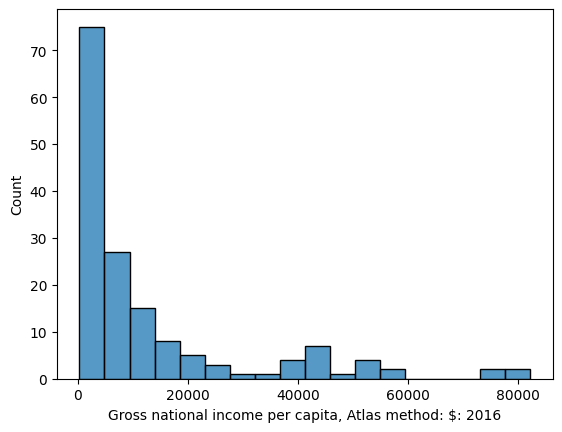

In [19]:
sns.histplot(data = wb, x = 'Gross national income per capita, Atlas method: $: 2016');

This diagram is known as a histogram. While it looks more reasonable, notice how we lose fine-grain information on the distribution of data contained within each bin. We can introduce rug plots to minimize this information loss. An overlaid "rug plot" displays the within-bin distribution of our data, as denoted by the thickness of the colored line on the x-axis.

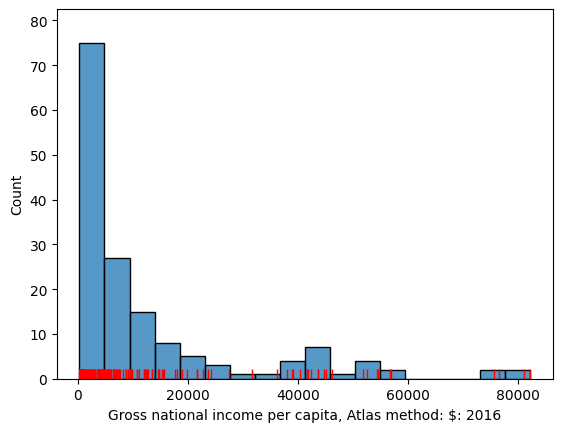

In [30]:
sns.histplot(data = wb, x = 'Gross national income per capita, Atlas method: $: 2016');
sns.rugplot(data = wb, x = 'Gross national income per capita, Atlas method: $: 2016', color = 'red');

You may have seen histograms drawn differently - perhaps with an overlaid **density curve** and normalized y-axis. We can display both with a few tweaks to our code. 

To visualize a density curve, we can set the the `kde = True` argument of the `sns.histplot`. Setting the argument `stat = 'density'` normalizes our histogram and displays densities, instead of counts, on the y-axis. You'll notice that the area under the density curve is 1. We will learn more about what's actually happening here in Lecture 8.

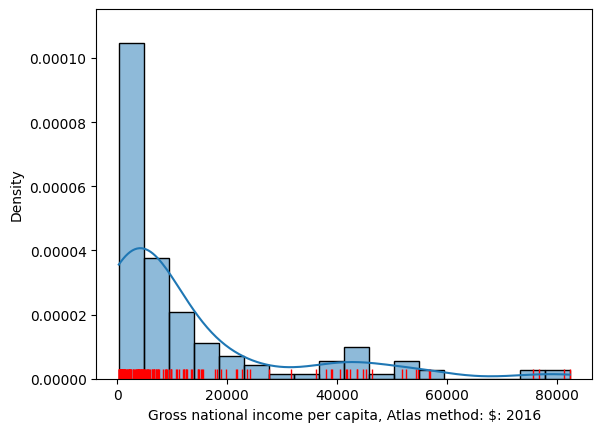

In [22]:
sns.histplot(data = wb, x = 'Gross national income per capita, Atlas method: $: 2016', kde = True, 
             stat = 'density')
sns.rugplot(data = wb, x = 'Gross national income per capita, Atlas method: $: 2016', color = 'red');

## Evaluating Histograms

Histograms allow us to assess a distribution by their shape. There are a few properties of histograms we can analyze:

1. Skewness and Tails
    - Skewed left vs skewed right
    - Left tail vs right tail
2. Outliers
    - Defined arbitrarily for now
3. Modes
    - Most commonly occuring data

### Skewness and Tails

If a distribution has a long right tail (such as `Gross national income per capita`), it is **skewed right**. In a right-skewed distribution, the few large outliers "pull" the mean to the **right** of the median.

If a distribution has a long left tail, it is **skewed left**. In a left-skewed distribution, the few small outliers "pull" the mean to the **left** of the median. 

In the case where a distribution has equal-sized right and left tails, it is **symmetric**. The mean is approximately **equal** to the median. Think of mean as the balancing point of the distribution

The mean is: 12963.312101910828 and the median is 5280.0


nan

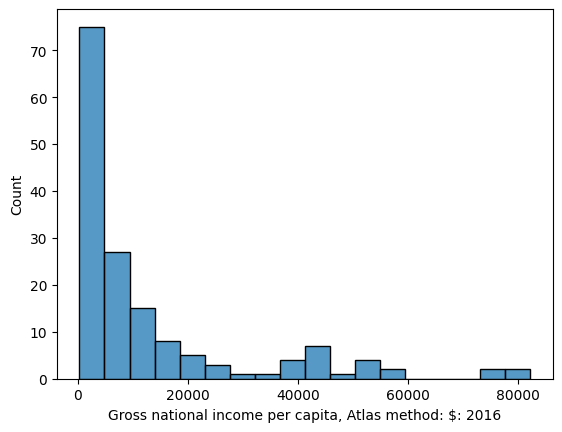

In [29]:
import numpy as np

sns.histplot(data = wb, x = 'Gross national income per capita, Atlas method: $: 2016');
df_mean = np.mean(wb['Gross national income per capita, Atlas method: $: 2016'])
# nanmedian allows us to find the median even when the column has NaN values
df_median = np.nanmedian(wb['Gross national income per capita, Atlas method: $: 2016']) 
print("The mean is: {} and the median is {}".format(df_mean,df_median))

### Outliers

Loosely speaking, an **outlier** is defined as a data point that lies an abnormally large distance away from other values. We'll define the statistical measure for this shortly.

Outliers disproportionately influence the mean because their magnitude is directly involved in computing the average. However, the median is largely unaffected - the magnitude of an outlier is irrelevant; we only care that it is some non-zero distance away from the midpoint of the data.

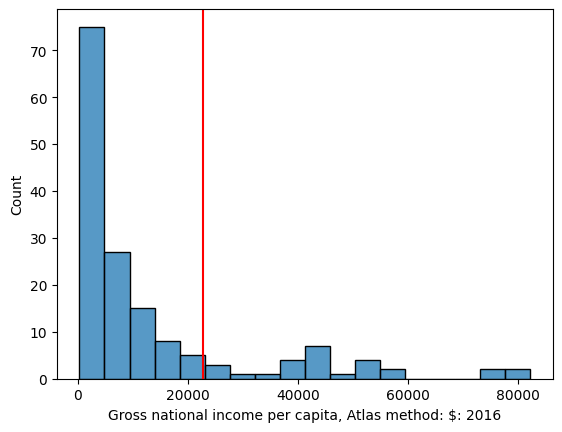

In [31]:
sns.histplot(data = wb, x = 'Gross national income per capita, Atlas method: $: 2016');
## Where do we draw the line of outlier? 
plt.axvline(df_mean*1.75, color = 'red');

### Modes

A **mode** of a distribution is a local or global maximum. A distribution with a single clear maximum is **unimodal**, distributions with two modes are **bimodal**, and those with 3 or more are **multimodal**. You need to distinguish between **modes** and *random noise*.


For example, the distribution of the prevalence of diabetes is unimodal.

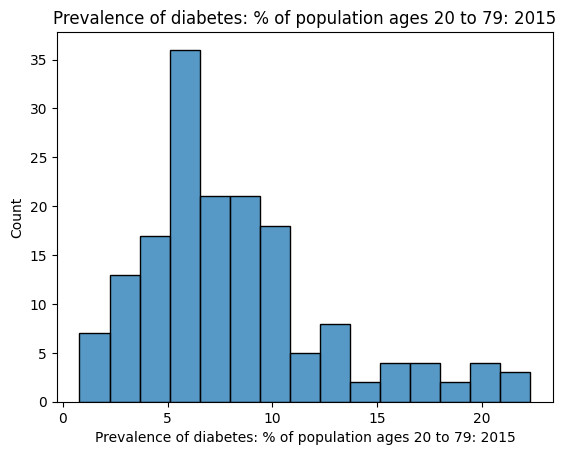

In [42]:
wb_asia = wb
sns.histplot(data = wb_asia, bins = 15, x = 'Prevalence of diabetes: % of population ages 20 to 79: 2015')\
            .set(title = 'Prevalence of diabetes: % of population ages 20 to 79: 2015');

On the other hand, the distribution of birth weights for maternal non-smokers is weakly bi-modal.

In [ ]:
births_maternal_non_smoker = births[births['Maternal Smoker'] == False]
sns.histplot(data = births_maternal_non_smoker, x = 'Maternal Pregnancy Weight')\
            .set(title = 'Maternal Non-Smoker histogram');

However, changing the bins reveals that the data is not bi-modal.

In [ ]:
sns.histplot(data = births_maternal_non_smoker, x = 'Maternal Pregnancy Weight',\
             bins = 20);

## Density Curves

Instead of a discrete histogram, we can visualize what a continuous distribution corresponding to that same data could look like using a curve.
- The smooth curve drawn on top of the histogram here is called a density curve.

In lecture 8, we will study how exactly to compute these density curves (using a technique is called Kernel Density Estimation). 

If we plot `birth weights` of babies of *smoking mothers*, we get a histogram that appears bimodal.

- Density curve reinforces belief in this bimodality.

However, if we plot `birth weights` of babies of *non-smoking mothers*, we get a histogram that appears unimodal.

From a goal 1 perspective, this is EDA which tells us there may be something interesting here worth pursuing.

- Deeper analysis necessary!
- If we found something truly interesting, we’d have to cautiously write up an argument and create goal 2 level visualizations.

In [ ]:
births_non_maternal_smoker = births[births['Maternal Smoker'] == False]
births_maternal_smoker = births[births['Maternal Smoker'] == True]
 
sns.histplot(data = births_maternal_smoker , x = 'Birth Weight',\
             kde = True);

In [ ]:
sns.histplot(data = births_non_maternal_smoker , x = 'Birth Weight',\
             kde = True);

### Histograms and Density

Rather than labeling by counts, we can instead plot the density, as shown below. Density gives us a measure that is invariant to the total number of observed units. The numerical values on the Y-axis for a sample of 100 units would be the same for when we observe a sample of 10000 units instead. We can still calculate the absolute number of observed units using density.

Example: There are 1174 observations total.
- Total area of this bin should be: 120/1174  = ~10%
- Density of this bin is therefore: 10% / (115 - 110) = 0.02

<img src="images/example_density.png" alt='example_density.png' width='500'>

## Box Plots and Violin Plots

### Boxplots

**Boxplots** are an alternative to histograms that visualize numerical distributions. They are especially useful in graphicaly summarizing several characteristics of a distribution. These include:

1. Lower Quartile ($1^{st}$ Quartile)
2. Median ($2^{nd}$ Quartile)
3. Upper Quartile ($3^{rd}$ Quartile)
4. Interquartile Range (IQR)
5. Whiskers
6. Outliers

The **lower quartile**, **median**, and **uper quartile** are the $25^{th}$, $50^{th}$, and $75^{th}$ percentiles of data, respectively. The **interquartile range** measures the spread of the middle $50$% of the distribution, calculated as the ($3^{rd}$ Quartile $-$ $1^{st}$ Quartile).

The **whiskers** of a box-plot are the two points that lie at the \[$1^{st}$ Quartile $-$ ($1.5\times$ IQR)\], and the \[$3^{rd}$ Quartile $+$ ($1.5\times$ IQR)\]. They are the lower and upper ranges of "normal" data (the points excluding outliers). Subsequently, the **outliers** are the data points that fall beyond the whiskers, or further than ($1.5 \times$ IQR) from the extreme quartiles.

Let's visualize a box-plot of the `Birth Weight` column.

In [ ]:
#| code-fold: true

sns.boxplot(data = births, y = 'Birth Weight');

bweights = births['Birth Weight']
q1 = np.percentile(bweights, 25)
q2 = np.percentile(bweights, 50)
q3 = np.percentile(bweights, 75)
iqr = q3 - q1
whisk1 = q1 - (1.5 * iqr)
whisk2 = q3 + (1.5 * iqr)

print("The first quartile is {}".format(q1))
print("The second quartile is {}".format(q2))
print("The third quartile is {}".format(q3))
print("The interquartile range is {}".format(iqr))
print("The whiskers are {} and {}".format(whisk1, whisk2))

Here is a helpful visual that summarizes our discussion above.

<img src="images/box-plot_vis.png" alt='box-plot_vis' width='500'>

### Violin Plots

Another diagram that is useful in visualizing a variable's distribution is the violin plot. A **violin plot** supplements a box-plot with a smoothed density curve on either side of the plot. These density curves highlight the relative frequency of variable's possible values. If you look closely, you'll be able to discern the quartiles, whiskers, and other hallmark features of the box-plot.

In [ ]:
sns.violinplot(data = births, y = 'Birth Weight');

## Comparing Quantitative Distributions

Earlier in our discussion of the mode, we visualized two histograms that described the distribution of birth weights for maternal smokers and non-smokers. However, comparing these histograms was difficult because they were displayed on seperate plots. Can we overlay the two to tell a more compelling story?

In `seaborn`, multiple calls to a plotting library in the same code cell will overlay the plots. For example:

In [ ]:
births_maternal_smoker = births[births['Maternal Smoker'] == False]
births_non_maternal_smoker = births[births['Maternal Smoker'] == True]

sns.histplot(data = births_maternal_smoker, x = 'Birth Weight',
             color = 'orange', label = 'smoker')
sns.histplot(data = births_non_maternal_smoker, x = 'Birth Weight',
             color = 'blue', label = 'nonsmoker')
plt.legend();

However, notice how this diagram suffers from overplotting. We can fix this with a call to `sns.kdeplot`. This will remove the bins and overlay the histogram with a density curve that better summarizes the distribution.

In [ ]:
sns.kdeplot(data = births_maternal_smoker, x = 'Birth Weight', color = 'orange', label = 'smoker')
sns.kdeplot(data = births_non_maternal_smoker, x = 'Birth Weight', color = 'blue', label = 'nonsmoker')
plt.legend();

Unfortunately, we lose critical information in our distribution by removing small details. Therefore, we typically prefer to use box-plots and violin plots when comparing distributions. These are more concise and allow us to compare summary statistics across many distributions.

In [ ]:
sns.violinplot(data = births, x = 'Maternal Smoker', y = 'Birth Weight');

In [ ]:
sns.boxplot(data=births, x = 'Maternal Smoker', y = 'Birth Weight');

## Ridge Plots
Ridge plots show many density curves offset from one another with minimal overlap. They are useful when the specific shape of each curve is important.

<img src = "images/example_ridge.png" alt ="example_ridge.png" ></img>
